# Data Science and Business analytics intern at spark foundation #GRIPJAN 21

# Task 1

# Prediction using Supervised ML
 Predict the percentage of an student based on the no. of study hours.
 This is a simple linear regression task as it involves just 2 variables.

# Author : Sumit Bhattacharjee

In [1]:
#import all the required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# import data by using pandas library
df = pd.read_csv("http://bit.ly/w-data")
print("data import successfully")
df.head()

data import successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Shape of Dataset(Rows and Columns)

In [3]:
df.shape #from that we can get how many column and row

(25, 2)

# Data Preprocessing and EDA

In [4]:
list(df.columns) #its good have know the columns name its save me from getting some typoerror

['Hours', 'Scores']

In [5]:
df.info() #from info we get the type of data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe() #from describe we get the mean, median and standerd deviation which help in understanding the data is normalize or not

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.isnull().sum() #from isnull we get that is there any missing value or not

Hours     0
Scores    0
dtype: int64

In [8]:
df.corr() 

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


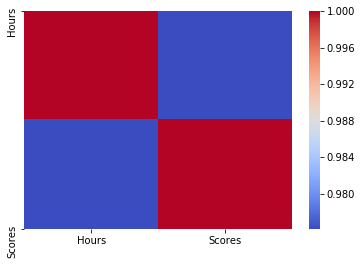

In [9]:
sb.heatmap(data = df.corr(),cmap = 'coolwarm')

all columns in data set is continous variable so we use sctter plot to represent the visulization of dataset

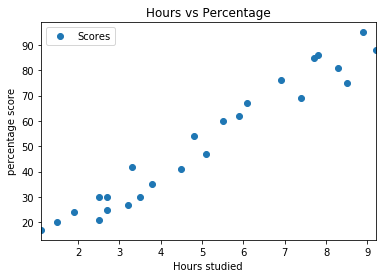

In [10]:
#plotting scatter plot
df.plot(x = 'Hours',y = 'Scores', style = 'o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('percentage score')
plt.show()

#### From the graph we clearly see that there is a positive linear relation between the number of hours studied and percentage score

# Preparing the data

### define x and y variable

In [11]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

# spliting the data into training and testing set  

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print('model training complete')

model training complete


#### plotting the regression line

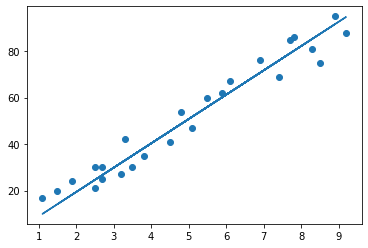

In [16]:
line = lr.coef_*X + lr.intercept_
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

##### now after training the models its time to do some prediction 

In [17]:
print(X_test)
y_pred = lr.predict(X_test)
y_test

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]]


array([17, 42, 24, 75, 54], dtype=int64)

### compare actual vs predicted

In [18]:
comparision = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
comparision

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


### evaluating the model

In [19]:
hours = 9.25
own_pred = lr.predict([[hours]])
print("no.of hrs:{}".format(hours))
print("predicted_score:{}".format(own_pred[0]))

no.of hrs:9.25
predicted_score:95.22829438402952


# THANK YOU